In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
10/344

0.029069767441860465

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [9]:
df['island'].value_counts()

island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

In [10]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [11]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [19]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [21]:
df['sex'].replace('.','FEMALE',inplace=True)

In [22]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

In [23]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

### Data Visualization

In [24]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [27]:
df.groupby('species').describe().transpose()

species                       Adelie    Chinstrap       Gentoo
culmen_length_mm  count   146.000000    68.000000   120.000000
                  mean     38.823973    48.833824    47.542500
                  std       2.662597     3.339256     3.105692
                  min      32.100000    40.900000    40.900000
                  25%      36.725000    46.350000    45.300000
                  50%      38.850000    49.550000    47.350000
                  75%      40.775000    51.075000    49.600000
                  max      46.000000    58.000000    59.600000
culmen_depth_mm   count   146.000000    68.000000   120.000000
                  mean     18.347260    18.420588    15.002500
                  std       1.219338     1.135395     0.983944
                  min      15.500000    16.400000    13.100000
                  25%      17.500000    17.500000    14.200000
                  50%      18.400000    18.450000    15.000000
                  75%      19.000000    19.400000    15.725000
                  max      21.500000    20.800000    17.300000
flipper_length_mm count   146.000000    68.000000   120.000000
                  mean    190.102740   195.823529   217.233333
                  std       6.521825     7.131894     6.557738
                  min     172.000000   178.000000   203.000000
                  25%     186.000000   191.000000   212.000000
                  50%     190.000000   196.000000   216.000000
                  75%     195.000000   201.000000   221.250000
                  max     210.000000   212.000000   231.000000
body_mass_g       count   146.000000    68.000000   120.000000
                  mean   3706.164384  3733.088235  5090.625000
                  std     458.620135   384.335081   499.759002
                  min    2850.000000  2700.000000  3950.000000
                  25%    3362.500000  3487.500000  4700.000000
                  50%    3700.000000  3700.000000  5050.000000
                  75%    4000.000000  3950.000000  5500.000000
                  max    4775.000000  4800.000000  6300.000000

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

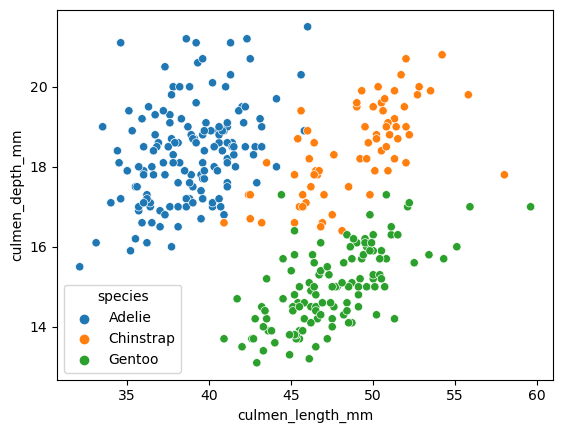

In [28]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')

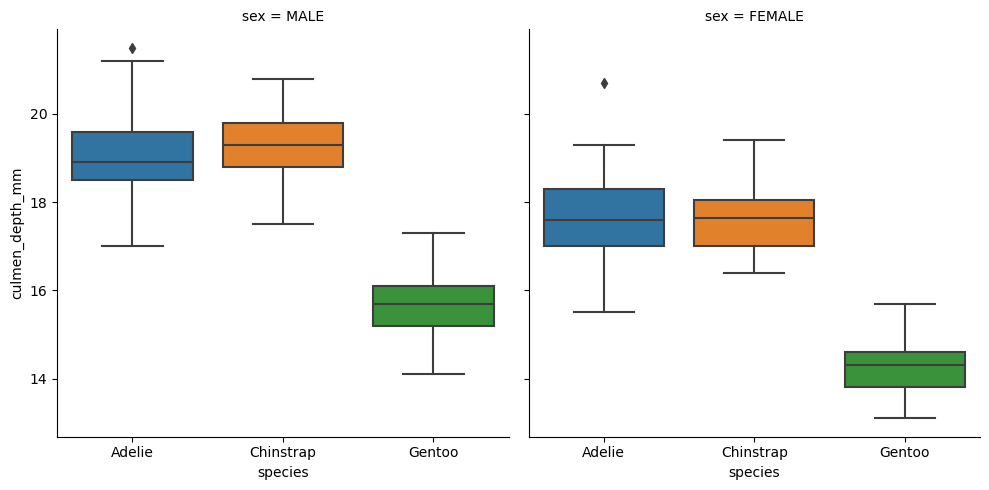

In [31]:
sns.catplot(x='species',y='culmen_depth_mm',data=df,col='sex',kind='box')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

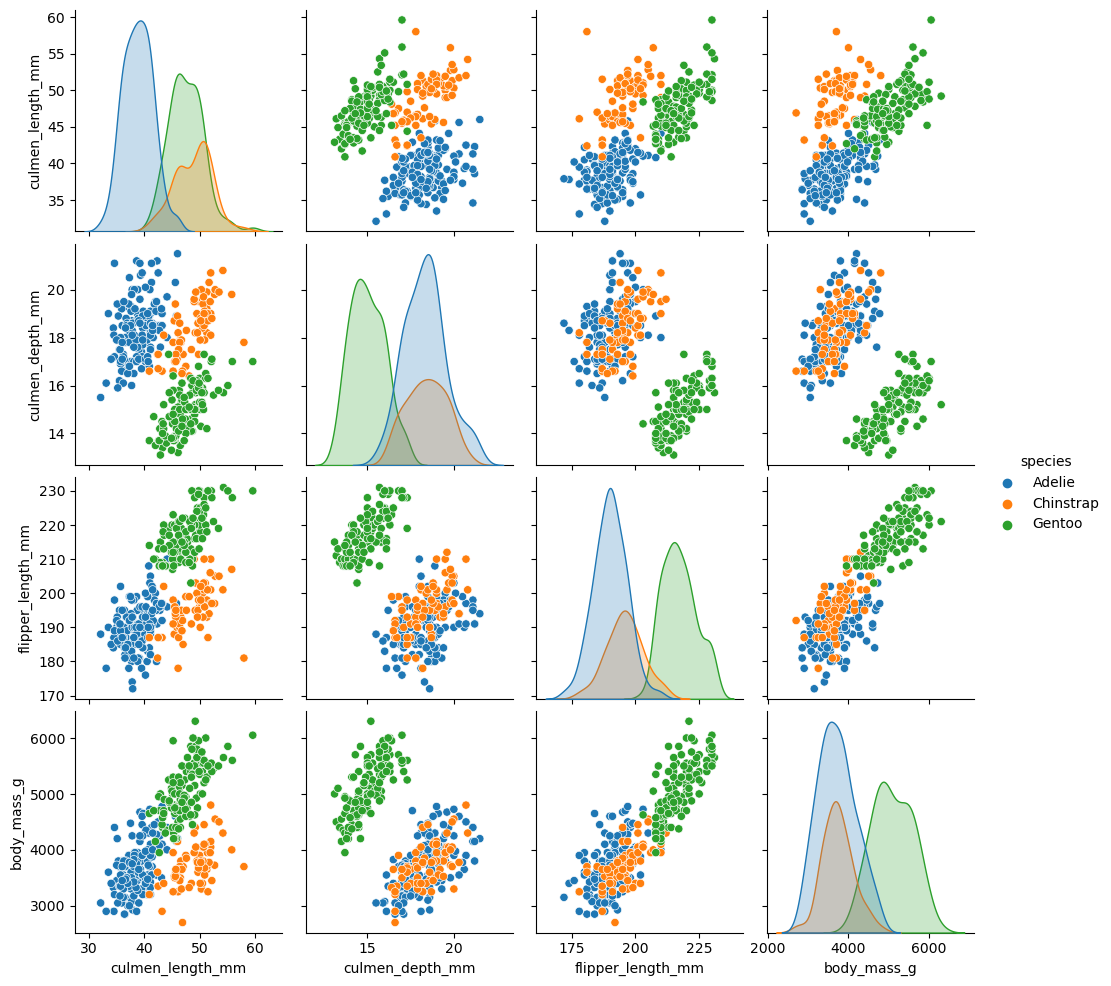

In [33]:
sns.pairplot(df,hue='species')

### Feature Engineering

In [35]:
pd.get_dummies(df,drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,True,False,False,False
340,46.8,14.3,215.0,4850.0,False,True,False,False,False
341,50.4,15.7,222.0,5750.0,False,True,False,False,True
342,45.2,14.8,212.0,5200.0,False,True,False,False,False


### Train | Test Split

In [36]:
X = pd.get_dummies(df.drop('species',axis=1), drop_first=True)
y = df['species']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = model.predict(X_test)

#### Model Evaluation

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
confusion_matrix(y_test,y_pred)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [46]:
model.feature_importances_

array([0.33754639, 0.05221421, 0.53120101, 0.01085298, 0.0681854 ,
       0.        , 0.        ])

In [47]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

### Visualize the tree

In [48]:
from sklearn.tree import plot_tree

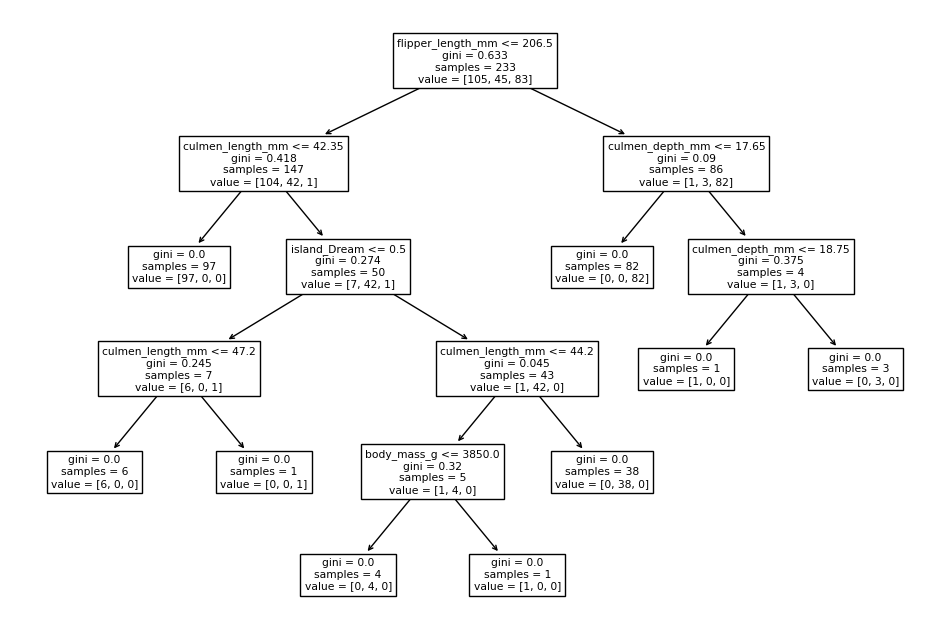

In [53]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns)
plt.show()

### Experimenting Hyperparameters

In [58]:
def report_model(model1):
    model1.fit(X_train,y_train)
    model_pred = model1.predict(X_test)
    print(classification_report(y_test,model_pred))
    print()
    plt.figure(figsize=(12,8))
    plot_tree(model1, feature_names=X.columns)

In [59]:
#max_depth
md_model = DecisionTreeClassifier(max_depth=2)


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101




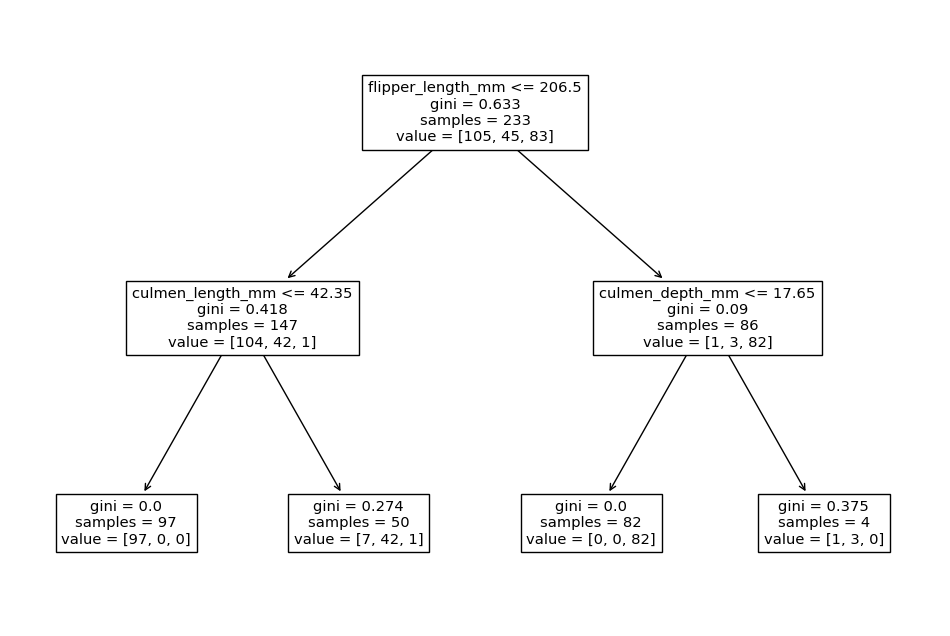

In [60]:
report_model(md_model)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.95       101
   macro avg       0.95      0.94      0.94       101
weighted avg       0.95      0.95      0.95       101




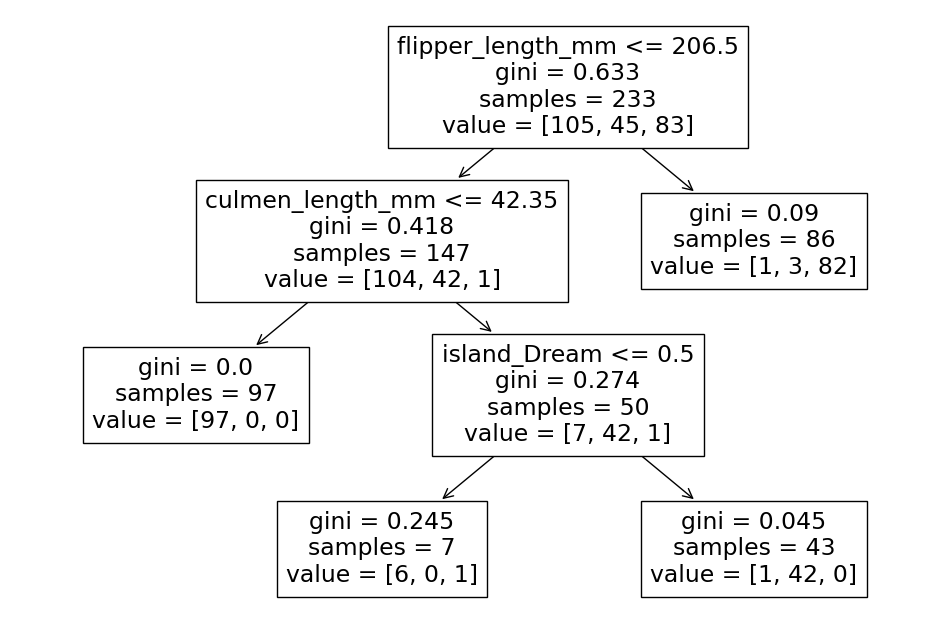

In [62]:
#max leaf nodel
ml_model = DecisionTreeClassifier(max_leaf_nodes=4)
report_model(ml_model)